# Dataset


*   https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv
*   https://www.kaggle.com/datasets/yasserh/twitter-tweets-sentiment-dataset/data
*   https://www.kaggle.com/datasets/mdismielhossenabir/sentiment-analysis/data
*   https://www.kaggle.com/datasets/kashishparmar02/social-media-sentiments-analysis-dataset/data



**Help Taken From**

https://towardsdatascience.com/social-media-sentiment-analysis-49b395771197



In [ ]:
import re
import warnings
import nltk
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import string

In [ ]:
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [ ]:
#DataSet Reading

train_df = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv')
train_df_original = train_df.copy()

test_df = pd.read_csv('https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/test.csv')
test_df_original = test_df.copy()

In [ ]:
train_df = train_df.drop(['id'], axis=1)
test_df = test_df.drop(['id'], axis=1)

In [ ]:
new_df = pd.read_csv('https://drive.google.com/uc?export=download&id=1rknpWbz8FopOjS_NM1vACENqRGfn3Asj')
new_df = new_df.drop(['Year', 'Month', 'Day', 'Time of Tweet', 'Platform'], axis=1)
new_df["sentiment"] = [0 if sent == "positive" or sent == "neutral" else 1 for sent in new_df["sentiment"]]
new_df.rename(columns={"text": "tweet", "sentiment": "label"}, inplace=True)

new_df.head()

,tweet,label
0,What a great day!!! Looks like dream.,0
1,"I feel sorry, I miss you here in the sea beach",0
2,Don't angry me,1
3,We attend in the class just for listening teac...,1
4,"Those who want to go, let them go",1


In [ ]:
new_df2 = pd.read_csv('https://drive.google.com/uc?export=download&id=1NhK9TJk9W3LMEXvm_KUqcfWBOxCkTU8x')
new_df2["Text"] = [(new_df2["Text"][idx] + " " + new_df2["Hashtags"][idx]) for idx in new_df2.index]
new_df2 = new_df2.drop(['Unnamed: 0.1', 'Timestamp', 'User', 'Platform', 'Hashtags', 'Retweets', 'Unnamed: 0', 'Likes', 'Country', 'Year', 'Month', 'Day', 'Hour'], axis=1)
new_df2["Sentiment"] = [1 if sent == "Negative" else 0 for sent in new_df2["Sentiment"]]
new_df2.rename(columns={'Text': 'tweet', 'Sentiment': 'label'}, inplace=True)
new_df2.head()

,tweet,label
0,Enjoying a beautiful day at the park! ...,0
1,Traffic was terrible this morning. ...,0
2,Just finished an amazing workout! 💪 ...,0
3,Excited about the upcoming weekend getaway! ...,0
4,Trying out a new recipe for dinner tonight. ...,0


In [ ]:
new_df3 = pd.read_csv('https://drive.google.com/uc?export=download&id=1aJXwapblbdjQGwahsArZ3xbNgZsWs0eT')
new_df3 = new_df3.drop(['textID', 'selected_text'], axis=1)
new_df3["sentiment"] = [0 if sen == 'positive' or sen == 'neutral' else 1 for sen in new_df3['sentiment']]
new_df3.rename(columns={'text': 'tweet', 'sentiment': 'label'}, inplace=True)
new_df3.head()

,tweet,label
0,"I`d have responded, if I were going",0
1,Sooo SAD I will miss you here in San Diego!!!,1
2,my boss is bullying me...,1
3,what interview! leave me alone,1
4,"Sons of ****, why couldn`t they put them on t...",1


In [ ]:
combine_df = pd.concat([train_df, test_df, new_df, new_df2, new_df3], ignore_index=True, sort=True)
combine_df['tweet'] = combine_df['tweet'].astype(str)
combine_df.head()

,label,tweet
0,0.0,@user when a father is dysfunctional and is s...
1,0.0,@user @user thanks for #lyft credit i can't us...
2,0.0,bihday your majesty
3,0.0,#model i love u take with u all the time in ...
4,0.0,factsguide: society now #motivation


In [ ]:
print(combine_df.shape)
print(combine_df.dtypes)

(77871, 2)
label    float64
tweet     object
dtype: object


In [ ]:
#Data Transformation

def remove_pattern(text, pattern):
  r = re.findall(pattern, text)

  for i in r:
    text = re.sub(i,"",text)

  return text

# np.vectorize() is much more faster than the conventional for loops when working on datasets of medium to large sizes.
combine_df['tidy_tweet'] = np.vectorize(remove_pattern)(combine_df['tweet'], "@[\w]*")
combine_df.head()

,label,tweet,tidy_tweet
0,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,0.0,bihday your majesty,bihday your majesty
3,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [ ]:
#removing punctuations, special characters and numbers
#we will replace everything except characters and hashtags with spaces

combine_df['tidy_tweet'] = combine_df['tidy_tweet'].str.replace("[^a-zA-Z#]", " ", regex=True)
combine_df.head(10)

,label,tweet,tidy_tweet
0,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,0.0,bihday your majesty,bihday your majesty
3,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,0.0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before the...
6,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams ...
8,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land #allin #cavs #champ...
9,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here i m it s so #gr


In [ ]:
#Remvoing Stop words

combine_df['tidy_tweet'] = combine_df['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combine_df.head(10)

,label,tweet,tidy_tweet
0,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,0.0,bihday your majesty,bihday your majesty
3,0.0,#model i love u take with u all the time in ...,#model love take with time
4,0.0,factsguide: society now #motivation,factsguide society #motivation
5,0.0,[2/2] huge fan fare and big talking before the...,huge fare talking before they leave chaos disp...
6,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,0.0,the next school year is the year for exams.ð...,next school year year exams think about that #...
8,0.0,we won!!! love the land!!! #allin #cavs #champ...,love land #allin #cavs #champions #cleveland #...
9,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here


In [ ]:
#Tokenization
#the process of splitting a string of text into tokens

tokenized_tweet = combine_df['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head(10)

,tidy_tweet
0,"[when, father, dysfunctional, selfish, drags, ..."
1,"[thanks, #lyft, credit, cause, they, offer, wh..."
2,"[bihday, your, majesty]"
3,"[#model, love, take, with, time]"
4,"[factsguide, society, #motivation]"
5,"[huge, fare, talking, before, they, leave, cha..."
6,"[camping, tomorrow, danny]"
7,"[next, school, year, year, exams, think, about..."
8,"[love, land, #allin, #cavs, #champions, #cleve..."
9,"[welcome, here]"


In [ ]:
#Stemming
#rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word

from nltk import PorterStemmer
ps = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [ps.stem(w) for w in x])
tokenized_tweet.head(10)

,tidy_tweet
0,"[when, father, dysfunct, selfish, drag, kid, i..."
1,"[thank, #lyft, credit, cau, they, offer, wheel..."
2,"[bihday, your, majesti]"
3,"[#model, love, take, with, time]"
4,"[factsguid, societi, #motiv]"
5,"[huge, fare, talk, befor, they, leav, chao, di..."
6,"[camp, tomorrow, danni]"
7,"[next, school, year, year, exam, think, about,..."
8,"[love, land, #allin, #cav, #champion, #clevela..."
9,"[welcom, here]"


In [ ]:
for i in range(len(tokenized_tweet)):
  tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combine_df['tidy_tweet'] = tokenized_tweet
combine_df.head(10)

,label,tweet,tidy_tweet
0,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit cau they offer wheelchair v...
2,0.0,bihday your majesty,bihday your majesti
3,0.0,#model i love u take with u all the time in ...,#model love take with time
4,0.0,factsguide: society now #motivation,factsguid societi #motiv
5,0.0,[2/2] huge fan fare and big talking before the...,huge fare talk befor they leav chao disput whe...
6,0.0,@user camping tomorrow @user @user @user @use...,camp tomorrow danni
7,0.0,the next school year is the year for exams.ð...,next school year year exam think about that #s...
8,0.0,we won!!! love the land!!! #allin #cavs #champ...,love land #allin #cav #champion #cleveland #cl...
9,0.0,@user @user welcome here ! i'm it's so #gr...,welcom here


In [ ]:
#Data Visualization
#gives us an approximate idea about the dataset and what it is all about before proceeding to apply different machine learning models

#WordCloud
#visualisation wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes

In [ ]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests

In [ ]:
all_words_positive = ' '.join([text for text in combine_df['tidy_tweet'][combine_df['label'] == 0]])

In [ ]:
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library
wc = WordCloud(background_color="black", height=1500, width=4000, mask=Mask).generate(all_words_positive)

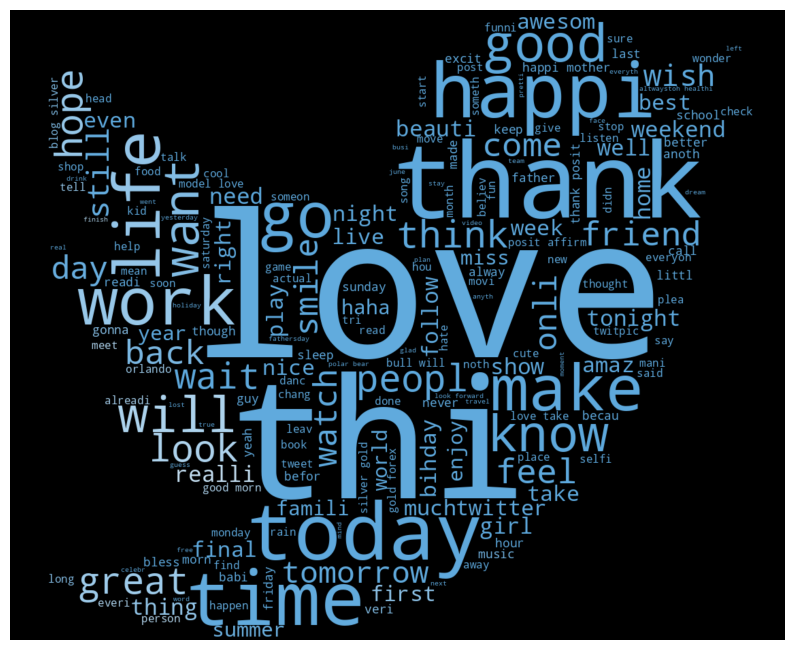

In [ ]:
plt.figure(figsize=(10, 20))

plt.imshow(wc.recolor(color_func=image_colors), interpolation="hamming")
plt.axis("off")
plt.show()

In [ ]:
all_words_negative = ' '.join([text for text in combine_df["tidy_tweet"][combine_df["label"] == 1]])

In [ ]:
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

image_colors = ImageColorGenerator(Mask)

wc = WordCloud(background_color="black", height=1500, width=4000, mask=Mask).generate(all_words_negative)

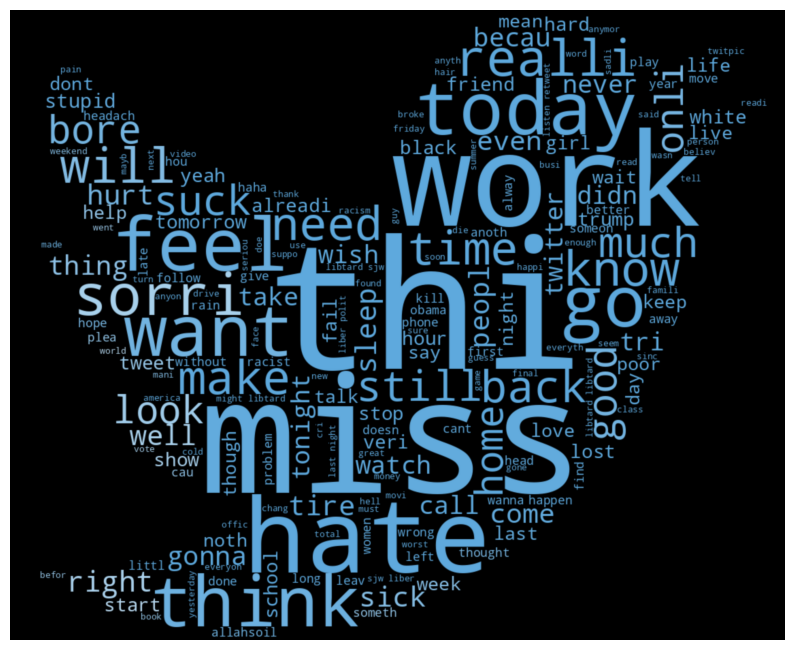

In [ ]:
plt.figure(figsize=(10, 20))

#interpolation is used to smooth the image generated
plt.imshow(wc.recolor(color_func=image_colors),interpolation="gaussian")

plt.axis("off")
plt.show()

In [ ]:
#Extracting hashtags from tweet

def hashtag_extract(x):
  hashtags = []

  for i in x:
    h = re.findall(r'#(\w+)',i)
    hashtags.append(h)

  return hashtags

In [ ]:
ht_positive = hashtag_extract(combine_df['tidy_tweet'][combine_df['label'] == 0])

#flatten the list inside of the ht_positive
ht_positive = sum(ht_positive, [])
ht_positive

['run',
 'lyft',
 'disapoint',
 'getthank',
 'model',
 'motiv',
 'allshowandnogo',
 'school',
 'exam',
 'hate',
 'imagin',
 'actorslif',
 'revolutionschool',
 'girl',
 'allin',
 'cav',
 'champion',
 'cleveland',
 'clevelandcavali',
 'ireland',
 'blog',
 'silver',
 'gold',
 'forex',
 'orlando',
 'standwithorlando',
 'pulseshoot',
 'orlandoshoot',
 'biggerproblem',
 'selfish',
 'heabreak',
 'valu',
 'love',
 'gettingf',
 'got',
 'junior',
 'yugyoem',
 'omg',
 'thank',
 'posit',
 'friday',
 'cooki',
 'euro',
 'badday',
 'coneofsham',
 'cat',
 'piss',
 'funni',
 'laugh',
 'wine',
 'weekend',
 'tgif',
 'gamedev',
 'indiedev',
 'indiegamedev',
 'squad',
 'upsideofflorida',
 'shopalyssa',
 'love',
 'smile',
 'media',
 'pressconf',
 'antalya',
 'turkey',
 'throwback',
 'ica',
 'rip',
 'orlando',
 'alohafriday',
 'time',
 'not',
 'exist',
 'positivevib',
 'hawaiian',
 'goodnight',
 'badmonday',
 'taylorswift',
 'travelingram',
 'dalat',
 'ripinkylif',
 'photoshop',
 'enoughisenough',
 'dontphot

In [ ]:
ht_negative = hashtag_extract(combine_df['tidy_tweet'][combine_df['label'] == 1])
ht_negative = sum(ht_negative, [])
ht_negative[:100]

['cnn',
 'michigan',
 'tcot',
 'australia',
 'opkillingbay',
 'seashepherd',
 'helpcovedolphin',
 'thecov',
 'helpcovedolphin',
 'neverump',
 'xenophobia',
 'love',
 'peac',
 'race',
 'ident',
 'med',
 'altright',
 'whitesupremaci',
 'linguist',
 'race',
 'power',
 'raciolinguist',
 'brexit',
 'peopl',
 'trump',
 'republican',
 'michelleobama',
 'knick',
 'golf',
 'jewishsupremacist',
 'libtard',
 'sjw',
 'liber',
 'polit',
 'trash',
 'hate',
 'stereotyp',
 'prejud',
 'hope',
 'hate',
 'conflict',
 'pol',
 'bluelivesmatt',
 'draintheswamp',
 'ferguson',
 'antisemit',
 'hocoschool',
 'columbiamd',
 'hocomd',
 'nazi',
 'hatr',
 'bigotri',
 'libtard',
 'sjw',
 'liber',
 'polit',
 'fyi',
 'tcot',
 'topoli',
 'blacklivesmatt',
 'ushistori',
 'eugen',
 'biher',
 'bigotri',
 'altright',
 'potu',
 'theresist',
 'crime',
 'offic',
 'black',
 'retweet',
 'tampa',
 'miami',
 'allahsoil',
 'prai',
 'cleveland',
 'rnc',
 'white',
 'tamirr',
 'rip',
 'bigot',
 'blacklivesmatt',
 'feminismiscanc',
 '

In [ ]:
#Plotting Bar Plots

word_freq_positive = nltk.FreqDist(ht_positive)
word_freq_positive

FreqDist({'love': 1659, 'posit': 918, 'smile': 676, 'healthi': 573, 'thank': 535, 'fun': 465, 'life': 425, 'affirm': 423, 'summer': 391, 'model': 375, ...})

In [ ]:
df_positive = pd.DataFrame({'Hashtags': list(word_freq_positive.keys()), 'Count': list(word_freq_positive.values())})
df_positive.head(10)

,Hashtags,Count
0,run,73
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375
5,motiv,203
6,allshowandnogo,1
7,school,30
8,exam,9
9,hate,27


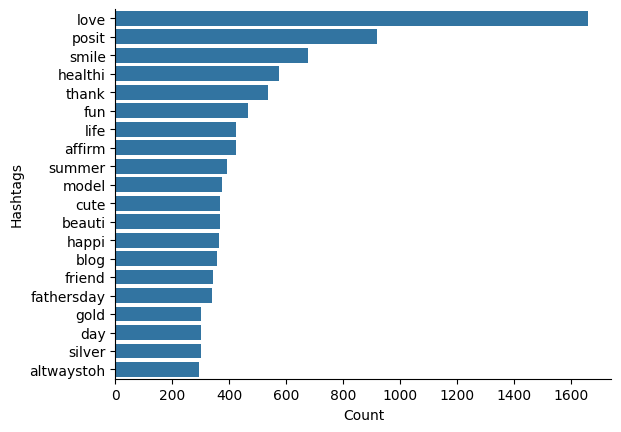

In [ ]:
df_positive_plot = df_positive.nlargest(20,columns='Count')

sns.barplot(data=df_positive_plot,y='Hashtags',x='Count')
sns.despine()

In [ ]:
word_freq_negative = nltk.FreqDist(ht_negative)
word_freq_negative

FreqDist({'trump': 136, 'polit': 95, 'allahsoil': 92, 'liber': 82, 'libtard': 77, 'sjw': 75, 'retweet': 63, 'black': 46, 'miami': 46, 'hate': 37, ...})

In [ ]:
df_negative = pd.DataFrame({'Hashtags': list(word_freq_negative.keys()), 'Count': list(word_freq_negative.values())})
df_negative.head(10)

,Hashtags,Count
0,cnn,10
1,michigan,2
2,tcot,16
3,australia,6
4,opkillingbay,5
5,seashepherd,22
6,helpcovedolphin,3
7,thecov,4
8,neverump,8
9,xenophobia,12


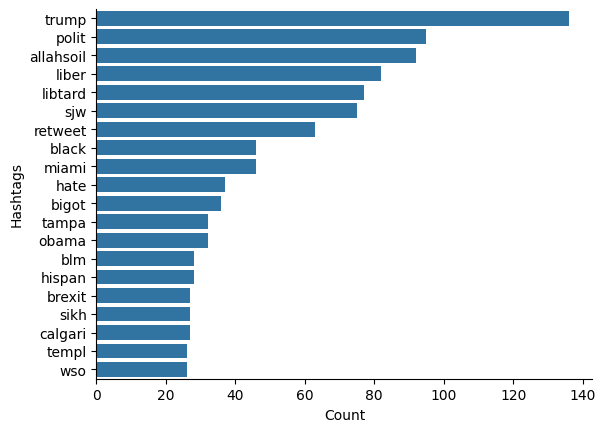

In [ ]:
df_negative_plot = df_negative.nlargest(20, columns='Count')

sns.barplot(data=df_negative_plot, y='Hashtags', x='Count')
sns.despine()